In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base= automap_base()

# reflect the tables
base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement= base.classes.measurement
station= base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.

session.query(func.count(measurement.date)).all()

[(19550,)]

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
lastDate = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"The last date is: {lastDate[0]}")


The last date is: 2017-08-23


In [56]:
last_date = dt.datetime.strptime(lastDate[0], '%Y-%M-%d')
last_date

datetime.datetime(2017, 1, 23, 0, 8)

In [58]:
# Perform a query to retrieve the data and precipitation scores
precipitation_df= session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_date).all()
precipitation_df


[('2017-01-24', 0.04),
 ('2017-01-25', 0.03),
 ('2017-01-26', 0.0),
 ('2017-01-27', 0.0),
 ('2017-01-28', 0.0),
 ('2017-01-29', 0.18),
 ('2017-01-30', 0.0),
 ('2017-01-31', 0.0),
 ('2017-02-01', 0.0),
 ('2017-02-02', 0.0),
 ('2017-02-03', 0.0),
 ('2017-02-04', 0.0),
 ('2017-02-05', 0.0),
 ('2017-02-06', 0.0),
 ('2017-02-07', 0.51),
 ('2017-02-08', 0.0),
 ('2017-02-09', 0.0),
 ('2017-02-10', 0.0),
 ('2017-02-11', 0.31),
 ('2017-02-12', 2.62),
 ('2017-02-13', 0.01),
 ('2017-02-14', 0.0),
 ('2017-02-15', 0.0),
 ('2017-02-16', 0.07),
 ('2017-02-17', 0.0),
 ('2017-02-18', 0.0),
 ('2017-02-19', 0.0),
 ('2017-02-20', 0.0),
 ('2017-02-21', 0.06),
 ('2017-02-22', 0.06),
 ('2017-02-23', 0.01),
 ('2017-02-24', 0.0),
 ('2017-02-25', 0.03),
 ('2017-02-26', 0.0),
 ('2017-02-27', 0.0),
 ('2017-02-28', 0.0),
 ('2017-03-01', 1.19),
 ('2017-03-02', 0.73),
 ('2017-03-03', 0.47),
 ('2017-03-04', 0.0),
 ('2017-03-05', 0.35),
 ('2017-03-06', 0.0),
 ('2017-03-07', 0.0),
 ('2017-03-08', 0.0),
 ('2017-03-09', 

In [59]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_df, columns=['Date','Precipitation'])
precipitation_df.head()

,Date,Precipitation
0,2017-01-24,0.04
1,2017-01-25,0.03
2,2017-01-26,0.00
3,2017-01-27,0.00
4,2017-01-28,0.00


In [60]:
# Sort the dataframe by date
precipitation_df= precipitation_df.sort_values(['Date'], ascending = True)
precipitation_df.head()

,Date,Precipitation
0,2017-01-24,0.04
668,2017-01-24,0.08
860,2017-01-24,0.13
207,2017-01-24,0.15
1058,2017-01-24,1.85


In [61]:
Inches=precipitation_df.set_index("Date")
Inches.head()

,Precipitation
Date,
2017-01-24,0.04
2017-01-24,0.08
2017-01-24,0.13
2017-01-24,0.15
2017-01-24,1.85


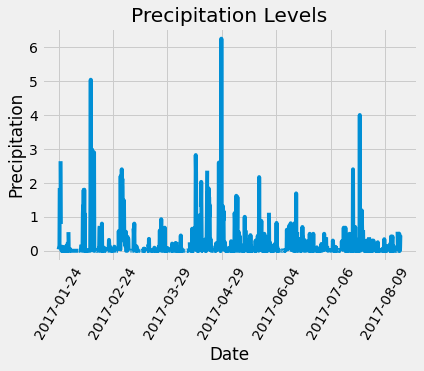

In [69]:
# Use Pandas Plotting with Matplotlib to plot the data
Inches.plot(rot=60, legend= False)
plt.title('Precipitation Levels')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.show()

In [70]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,1143.000000
mean,0.179755
std,0.474009
min,0.000000
25%,0.000000
50%,0.010000
75%,0.120000
max,6.250000


# Exploratory Station Analysis

In [71]:
# Design a query to calculate the total number stations in the dataset
stations_count=session.query(func.count(station.id)).all()
stations_count

[(9,)]

In [72]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations_count = session.query(measurement.station,func.count(measurement.station)).\
group_by(measurement.station).\
order_by(func.count(measurement.station).desc()).all()

active_stations_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [73]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
high_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').one()
low_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').one()
avg_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').one()

print(f'The highest temperature recorded for station USC00519281 was {high_temp}')
print(f'The lowest temperature recorded for station USC00519281 was {low_temp}')
print(f'The average temperature recorded for station USC00519281 was {avg_temp}')

The highest temperature recorded for station USC00519281 was (85.0,)
The lowest temperature recorded for station USC00519281 was (54.0,)
The average temperature recorded for station USC00519281 was (71.66378066378067,)


In [77]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281_df= session.query(measurement.date, measurement.tobs).\
        filter(measurement.station=='USC00519281').\
        filter(measurement.date >= last_date).all()

USC00519281_df[:10]

[('2017-01-24', 72.0),
 ('2017-01-25', 69.0),
 ('2017-01-26', 70.0),
 ('2017-01-27', 66.0),
 ('2017-01-28', 65.0),
 ('2017-01-29', 69.0),
 ('2017-01-30', 68.0),
 ('2017-01-31', 68.0),
 ('2017-02-01', 68.0),
 ('2017-02-02', 59.0)]

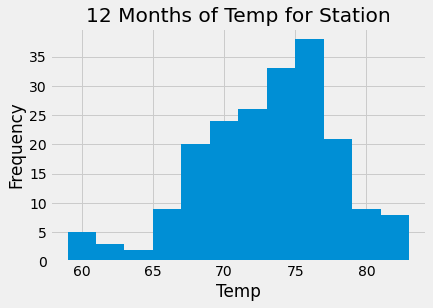

In [78]:
USC00519281_df = pd.DataFrame(USC00519281_df)
USC00519281_df.plot(kind='hist',bins=12,legend= False)

plt.title('12 Months of Temp for Station')
plt.ylabel('Frequency')
plt.xlabel('Temp')
plt.show()

# Close session

In [79]:
# Close Session
session.close()